In [1]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Read the CSV file into a DataFrame with header=None
data = pd.read_csv("filtered_file duplicate.csv", header=None)

# Extract the first row as column names and remove it from the DataFrame
column_names = data.iloc[0]
data = data[1:]

# Set the column names to the DataFrame
data.columns = column_names
data.head(5)

,selected_text,sentiment
1,"I`d have responded, if I were going",3
2,Sooo SAD,1
3,bullying me,1
4,leave me alone,1
5,"Sons of bitches,",1


In [3]:
data2 = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", sep=';', encoding='utf-8', header = 0)
headers = data2.iloc[0]
data2.columns = headers
data2 = data2.iloc[1:]
filtered_data = pd.DataFrame()
filtered_data['selected_text'] = data2['text']
filtered_data['sentiment'] = data2['sentiment']
filtered_data.head(5)

,selected_text,sentiment
1,#AAPL:The 10 best Steve Jobs emails ever...htt...,3
2,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,3
3,My cat only chews @apple cords. Such an #Apple...,3
4,I agree with @jimcramer that the #IndividualIn...,3
5,Nobody expects the Spanish Inquisition #AAPL,3


In [4]:
#combine the two data sets apple + general
data = pd.concat([data, filtered_data], axis=0)
data.head(100000)

,selected_text,sentiment
1,"I`d have responded, if I were going",3
2,Sooo SAD,1
3,bullying me,1
4,leave me alone,1
5,"Sons of bitches,",1
...,...,...
3882,(Via FC) Apple Is Warming Up To Social Media -...,3
3883,RT @MMLXIV: there is no avocado emoji may I as...,3
3884,@marcbulandr I could not agree more. Between @...,5
3885,My iPhone 5's photos are no longer downloading...,1


In [10]:
data = data[data['sentiment'] != 'not_relevant']
data['sentiment'].astype(int)

1       3
2       1
3       1
4       1
5       1
       ..
3882    3
3883    3
3884    5
3885    1
3886    5
Name: sentiment, Length: 31285, dtype: int64

In [11]:
data['selected_text'] = data['selected_text'].fillna('')
data['selected_text'] = data['selected_text'].str.lower()
data['selected_text'] = data['selected_text'].str.replace(r'http\S+', '', regex=True)
data['selected_text'] = data['selected_text'].str.replace(r'@\S+', '', regex=True)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['selected_text'])
vectorizer.get_feature_names_out()
y = data['sentiment']

In [12]:
y.shape

(31285,)

In [13]:
X.shape

(31285, 19568)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.6)

In [15]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
classification = classification_report(Y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           1       0.92      0.49      0.64      5404
           3       0.64      0.97      0.77      8017
           5       0.93      0.66      0.77      5350

    accuracy                           0.74     18771
   macro avg       0.83      0.71      0.73     18771
weighted avg       0.80      0.74      0.73     18771



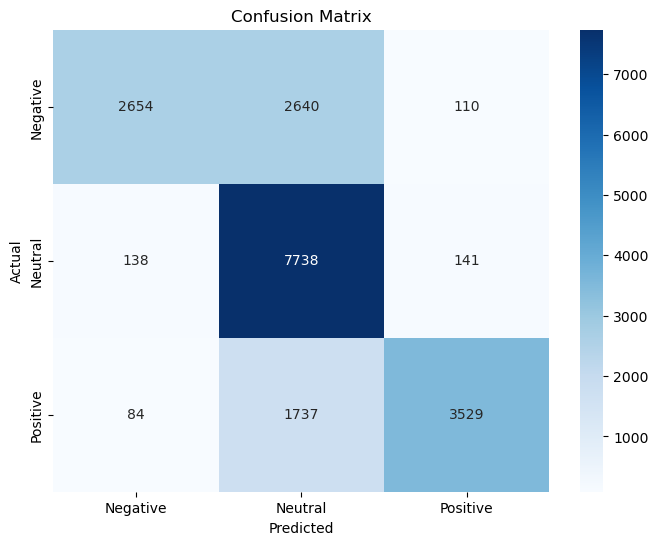

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()